# RQ 1.2

## Prerequisites: Evaluation Data
as part of the setup, we assume the stargan-v2 data is available under the following path:
- `src/cycle-diffusion/stargan-v2/data/test`

## Input Image ($x$) Perturbation: Rotation

In [6]:
!pwd

/home/lcur1732/cycle-diffusion-group12


In [30]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from PIL import Image
import os, os.path
from pathlib import Path

def load_data(path):
    imgs = []
    valid_images = [".jpg",".gif",".png",".tga"]
    # for f in os.listdir(path):
    for f in path.iterdir():
        # cat_files = [x for x in cat.iterdir()]
        # ext = os.path.splitext(f)[1]
        ext = f.suffix
        
        if ext not in valid_images:
            print(f"Skipping {f} because it is not a valid image")
            continue
        imgs.append(Image.open(os.path.join(path,f)))
        print(f"Loaded {f}")

    return imgs

def save_image_rotated(imgs, angle):
    
    for img in imgs:
        path, name  = Path(img.filename).parents[0], Path(img.filename).stem
        new_name = f'{name}_rotated_{str(angle)}.png'
        
        img2 = img.rotate(angle, )
        img2.save(path / new_name)

cwd = os.getcwd() # should be cycle-diffusion-group12 folder, otherwise change this

BASE_DIR = Path(cwd)

cat_path = BASE_DIR / 'src/cycle-diffusion/stargan-test2/data/test/cat'
dog_path = BASE_DIR / 'src/cycle-diffusion/stargan-test2/data/test/dog'
wild_path = BASE_DIR / 'src/cycle-diffusion/stargan-test2/data/test/wild'

cat_dataset = load_data(cat_path) 
dog_dataset = load_data(dog_path)
wild_dataset = load_data(wild_path) 

len(cat_dataset), len(dog_dataset), len(wild_dataset)

Loaded /home/lcur1732/cycle-diffusion-group12/src/cycle-diffusion/stargan-test2/data/test/cat/flickr_cat_000008.png
Loaded /home/lcur1732/cycle-diffusion-group12/src/cycle-diffusion/stargan-test2/data/test/dog/flickr_dog_000054.png
Loaded /home/lcur1732/cycle-diffusion-group12/src/cycle-diffusion/stargan-test2/data/test/wild/flickr_wild_000004.png


(1, 1, 1)

In [31]:
all_three = [cat_dataset, dog_dataset, wild_dataset]
angles = [0, 1, 5, 10, 30, 45, 90] # 0 is the duplicate of the original

for dataset in all_three:
    for angle in angles:
        save_image_rotated(dataset, angle)

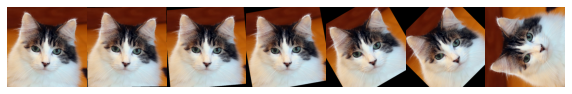

In [38]:
# show the rotated images
fig, axes = plt.subplots(1, 7, figsize=(10, 5))

# Display the first image in the first subplot
img_cat = imread(cat_path / 'flickr_cat_000008.png')
axes[0].imshow(img_cat)
axes[0].axis('off')

# Display the second image in the second subplot
img_cat_1 = imread(cat_path / 'flickr_cat_000008_rotated_1.png')
axes[1].imshow(img_cat_1)
axes[1].axis('off')

# Display the second image in the second subplot
img_cat_5 = imread(cat_path / 'flickr_cat_000008_rotated_5.png')
axes[2].imshow(img_cat_5)
axes[2].axis('off')

# Display the second image in the second subplot
img_cat_10 = imread(cat_path / 'flickr_cat_000008_rotated_10.png')
axes[3].imshow(img_cat_10)
axes[3].axis('off')

# Display the second image in the second subplot
img_cat_30 = imread(cat_path / 'flickr_cat_000008_rotated_30.png')
axes[4].imshow(img_cat_30)
axes[4].axis('off')

# Display the second image in the second subplot
img_cat_45 = imread(cat_path / 'flickr_cat_000008_rotated_45.png')
axes[5].imshow(img_cat_45)
axes[5].axis('off')

# Display the second image in the second subplot
img_cat_90 = imread(cat_path / 'flickr_cat_000008_rotated_90.png')
axes[6].imshow(img_cat_90)
axes[6].axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0)

# Show the figure
plt.show()


### Run cycle diffusion (DDPM)

In [39]:
# using slurm:
# !cd src/cycle-diffusion
# !sbatch test.job

# or from the terminal:
# !export CUDA_VISIBLE_DEVICES=0
# !export RUN_NAME=experiment_test2
# !export SEED=42
# !export LOCAL_RANK=0

# !python -m torch.distributed.launch --nproc_per_node 1 --master_port 1446 main.py --seed $SEED --cfg experiments/$RUN_NAME.cfg --run_name $RUN_NAME$SEED --logging_strategy steps --logging_first_step true --logging_steps 4 --evaluation_strategy steps --eval_steps 50 --metric_for_best_model CLIPEnergy --greater_is_better false --save_strategy steps --save_steps 50 --save_total_limit 1 --load_best_model_at_end --gradient_accumulation_steps 4 --num_train_epochs 0 --adafactor false --learning_rate 1e-3 --do_eval --output_dir output/$RUN_NAME$SEED --overwrite_output_dir --per_device_train_batch_size 1 --per_device_eval_batch_size 1 --eval_accumulation_steps 4 --ddp_find_unused_parameters true --verbose true --custom_z_name rotated_images --disable_wandb True --save_time_steps True


### Results

# Misc

### Compare images

In [ ]:
# from skimage.metrics import structural_similarity as ssim
from skimage.transform import resize
from evaluation.utils import calculate_ssim

# Load the two RGB images
image_c = imread("stargan-test/data/test/cat/flickr_cat_000008.png")
image0c = resize(image_c, (256, 256))

image_d = imread("stargan-test/data/test/dog/flickr_dog_000054.png")
image0d = resize(image_d, (256, 256))


image1 = imread("stargan-test/data/test/0.png")
image2 = imread("stargan-test/data/test/1.png")

# Calculate the structural similarity index
print(calculate_ssim(image_c, image_d))
print(calculate_ssim(image0c, image1))
print(calculate_ssim(image0c, image2))
print(calculate_ssim(image0d, image1))
print(calculate_ssim(image0d, image2))
print(calculate_ssim(image1, image2))

# Print the similarity score
# print("Similarity score:", ssim_score)